**Decision Tree:**
* For both classification and regression
* unsupervised learning
* uses tree representation to solve the problem
* **leaf node** - class label
* **internal node** - attributes
* contains only conditional control statements
* yes/no data for numeric data
* **asks a question and classifies based on answer**

**CART** is a predictive model - find variance based on other labeled variables.
* no need for standardisation of data in this

**Entropy** - measure of randomness in the information being preocessed
* Low entropy - high information gain - taken as root node
* high entropy - low information gain
* range of entropy is between 0 and 1
* I.G is **inversely proportional** to entropy


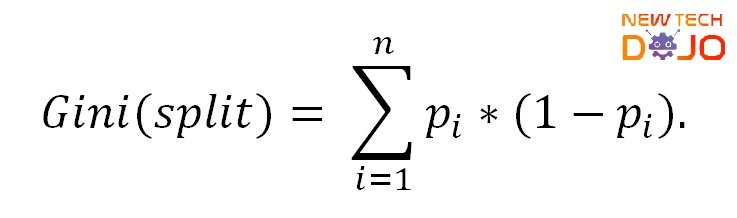

Gini impurity - to find the best split
gini impurity must be low and ig will be high


https://victorzhou.com/blog/gini-impurity/

***One hot encoding is similar to get_dummies\
label encoder and factorisation are similar***

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/car_data/car.data",names=['buying','maint','doors','persons','lug_boot','safety','class'])
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
data.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

In [ ]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
data[data['doors']== '4']

,buying,maint,doors,persons,lug_boot,safety,class
54,vhigh,vhigh,4,2,small,low,unacc
55,vhigh,vhigh,4,2,small,med,unacc
56,vhigh,vhigh,4,2,small,high,unacc
57,vhigh,vhigh,4,2,med,low,unacc
58,vhigh,vhigh,4,2,med,med,unacc
...,...,...,...,...,...,...,...
1696,low,low,4,more,med,med,good
1697,low,low,4,more,med,high,vgood
1698,low,low,4,more,big,low,unacc
1699,low,low,4,more,big,med,good


In [ ]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [ ]:
data['class'],class_names = pd.factorize(data['class']) #similar to label encoding
print(class_names)

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')


In [ ]:
data['class'].unique()

array([0, 1, 2, 3])

In [ ]:
data_backup = data.copy()
data_backup.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [ ]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()
# use _ inorder to use the same variable, avoid creating a new one

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [ ]:
data['safety'].unique()

array([0, 1, 2])

In [ ]:
x=data.drop('class',axis = 1)
y=data['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.tree  import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
train_pred = model.predict(x_train)

In [ ]:
print(accuracy_score(train_pred,y_train))

1.0


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9855491329479769
[[240   1   0   0]
 [  1  82   2   1]
 [  0   0   7   0]
 [  0   0   0  12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       0.99      0.95      0.97        86
           2       0.78      1.00      0.88         7
           3       0.92      1.00      0.96        12

    accuracy                           0.99       346
   macro avg       0.92      0.99      0.95       346
weighted avg       0.99      0.99      0.99       346



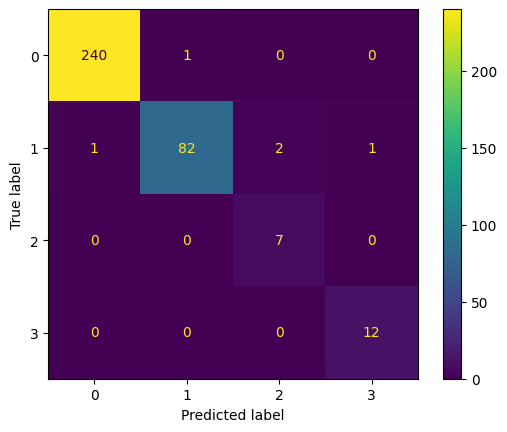

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred,y_test)).plot())